# Demo of LDAPathwayPrediction modeling pipeline

## Load all required modules

In [1]:
from Model import Model
from Validation import Validation
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import numpy as np

## Load data files 

In [2]:
data_df=Model().df_pkl
train,test,train_df,test_df=Model().get_train_and_test(data_df.copy())

## Get dictionary and corpus from train set

In [3]:
dictionary,corpus=Model().get_dict_corpus(train)
model=Model().MyLDA(corpus,dictionary,num_topics=100,random_state=200,passes=200)

## Get similarity between topics

#### Measure similarity between topics. The objective is to maximize dissimilarity between topics. Jaccard distance is a less conservative measurement, and is the default. Read gensim docs for other options.

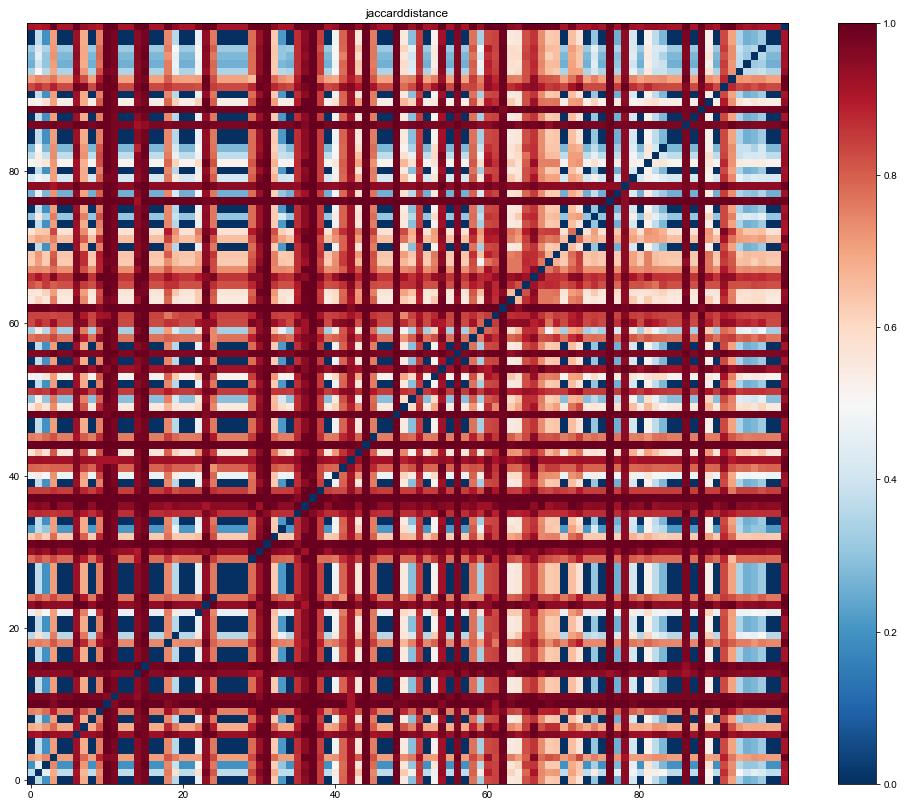

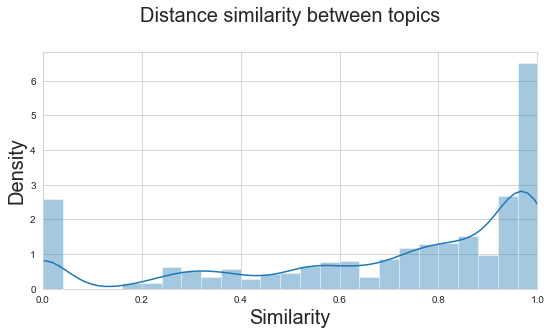

In [4]:
distance_list=Validation().get_topic_similarity(topics=150,model=model,distance='jaccard')

In [5]:
#higher the value, more dissimilar the topics
print ("Mean distance is {} and standard deviation is {}".format(np.mean(distance_list),np.std(distance_list)))

Mean distance is 0.6990471860664258 and standard deviation is 0.31902328239794314


## Test the model with test set
### Test 1: comparing enzymes in predicted topics with enzymes in true pathways

In [6]:
output=Validation().solution_for_one_df(test_df,dictionary,model)

test pathway:Polyketide sugar unit biosynthesis
Tp,Fp,Fn,Tn:(28, 212, 0, 3230); true length:28
test pathway:Phosphonate and phosphinate metabolism
Tp,Fp,Fn,Tn:(16, 409, 14, 3031); true length:30
test pathway:Glycosphingolipid biosynthesis - lacto and neolacto series
Tp,Fp,Fn,Tn:(1, 9, 14, 3446); true length:15
test pathway:Biosynthesis of vancomycin group antibiotics
Tp,Fp,Fn,Tn:(7, 208, 0, 3264); true length:7
test pathway:Steroid degradation
Tp,Fp,Fn,Tn:(8, 164, 7, 3291); true length:15
test pathway:Drug metabolism - other enzymes
Tp,Fp,Fn,Tn:(23, 520, 3, 2924); true length:26
test pathway:D-Alanine metabolism
Tp,Fp,Fn,Tn:(2, 48, 3, 3417); true length:5
test pathway:Fluorobenzoate degradation
Tp,Fp,Fn,Tn:(12, 343, 2, 3113); true length:14
test pathway:Biosynthesis of various secondary metabolites - part 1
Tp,Fp,Fn,Tn:(9, 158, 16, 3287); true length:25
test pathway:Ascorbate and aldarate metabolism
Tp,Fp,Fn,Tn:(23, 639, 25, 2783); true length:48


In [7]:
Validation().print_testing_results(output)

Recall mean: 0.6114258241758241 and median 0.5333333333333333
Precision mean: 0.05381790022207189 and median 0.041178637200736654
Accuracy mean: 0.9194967748027896 and median 0.9395588019678384
F1 mean: 0.0885059695364935 and median 0.07636363636363636
specificity mean: 0.9212848162221698 and median 0.9392500341404767


## Run n-fold validation to check test measures

In [8]:
output=Validation().nfold_cv(n=10)

test pathway:Polyketide sugar unit biosynthesis
Tp,Fp,Fn,Tn:(28, 119, 0, 3286); true length:28
test pathway:Ascorbate and aldarate metabolism
Tp,Fp,Fn,Tn:(22, 419, 26, 2966); true length:48
test pathway:Fatty acid degradation
Tp,Fp,Fn,Tn:(25, 502, 9, 2897); true length:34
test pathway:Nitrogen metabolism
Tp,Fp,Fn,Tn:(16, 418, 27, 2979); true length:43
test pathway:Vitamin B6 metabolism
Tp,Fp,Fn,Tn:(4, 263, 25, 3141); true length:29
test pathway:Tetracycline biosynthesis
Tp,Fp,Fn,Tn:(9, 114, 0, 3310); true length:9
test pathway:Lipoarabinomannan (LAM) biosynthesis
Tp,Fp,Fn,Tn:(0, 0, 3, 3430); true length:3
test pathway:Selenocompound metabolism
Tp,Fp,Fn,Tn:(12, 237, 6, 3215); true length:18
test pathway:Propanoate metabolism
Tp,Fp,Fn,Tn:(46, 747, 15, 2632); true length:61
test pathway:Lysine biosynthesis
Tp,Fp,Fn,Tn:(28, 159, 1, 3245); true length:29
test pathway:Carbon fixation pathways in prokaryotes
Tp,Fp,Fn,Tn:(55, 422, 0, 2964); true length:55
test pathway:Carbapenem biosynthesis
T

test pathway:Phenazine biosynthesis
Tp,Fp,Fn,Tn:(13, 432, 0, 2988); true length:13
test pathway:Benzoate degradation
Tp,Fp,Fn,Tn:(52, 702, 18, 2661); true length:70
test pathway:Lysine degradation
Tp,Fp,Fn,Tn:(27, 570, 43, 2793); true length:70
test pathway:Biosynthesis of antibiotics
Tp,Fp,Fn,Tn:(491, 1183, 61, 1728); true length:552
test pathway:Other types of O-glycan biosynthesis
Tp,Fp,Fn,Tn:(1, 14, 9, 3409); true length:10
test pathway:Cyanoamino acid metabolism
Tp,Fp,Fn,Tn:(17, 612, 15, 2796); true length:32
test pathway:Phenylalanine metabolism
Tp,Fp,Fn,Tn:(43, 778, 21, 2591); true length:64
test pathway:Toluene degradation
Tp,Fp,Fn,Tn:(24, 586, 3, 2820); true length:27
test pathway:Sulfur metabolism
Tp,Fp,Fn,Tn:(19, 557, 29, 2828); true length:48
test pathway:Pentose and glucuronate interconversions
Tp,Fp,Fn,Tn:(29, 459, 43, 2910); true length:72
test pathway:D-Arginine and D-ornithine metabolism
Tp,Fp,Fn,Tn:(6, 107, 6, 3314); true length:12


In [9]:
Validation().print_testing_results(output)

Recall mean: 0.641905759288503 and median 0.6251117075250961
Precision mean: 0.06542498440513808 and median 0.06417117969996906
Accuracy mean: 0.8959898437969146 and median 0.9027615398590308
F1 mean: 0.11123170243345995 and median 0.11477142111645214
specificity mean: 0.896927000651209 and median 0.9023601224004669


## Plot all relevant distributions

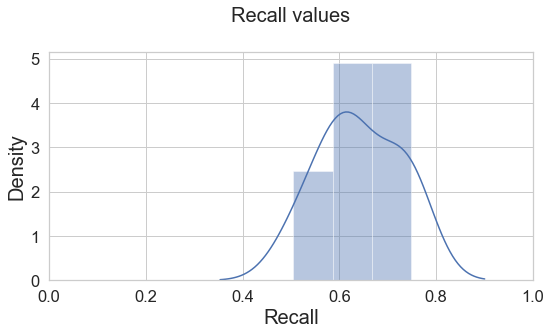

In [10]:
Validation().plot_a_distribution(output[0],xlabel='Recall',
                                xlim_tuple=(0,1),
                                ylabel='Density',title='Recall values')


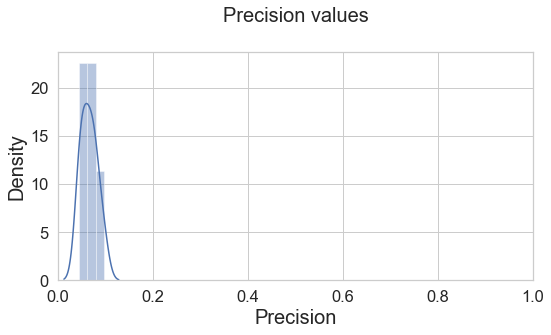

In [11]:
Validation().plot_a_distribution(output[1],xlabel='Precision',
                                xlim_tuple=(0,1),
                                ylabel='Density',title='Precision values')


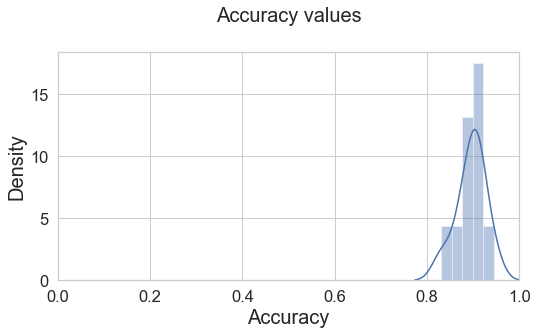

In [12]:
Validation().plot_a_distribution(output[2],xlabel='Accuracy',
                                xlim_tuple=(0,1),
                                ylabel='Density',title='Accuracy values')


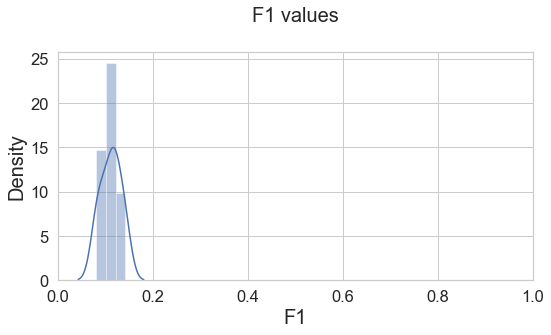

In [13]:
Validation().plot_a_distribution(output[3],xlabel='F1',
                                xlim_tuple=(0,1),
                                ylabel='Density',title='F1 values')


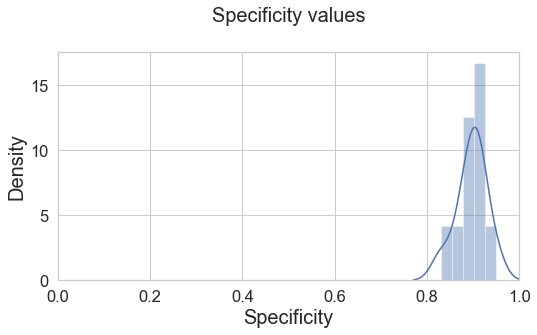

In [14]:
Validation().plot_a_distribution(output[4],xlabel='Specificity',
                                xlim_tuple=(0,1),
                                ylabel='Density',title='Specificity values')


###  Test 2: similarity of test document with documents in the training set

#### Measure similarity between distribution of topics. The objective is to maximize similarity between topics. Jensen-Shannon distance is a symmetric measurement and is used in the test. [Read this, for more information on JSD](https://www.cise.ufl.edu/~anand/sp06/jensen-shannon.pdf)

In [15]:
df_result=Validation().compare_test_train_docs(test_df,train_df,model,dictionary)

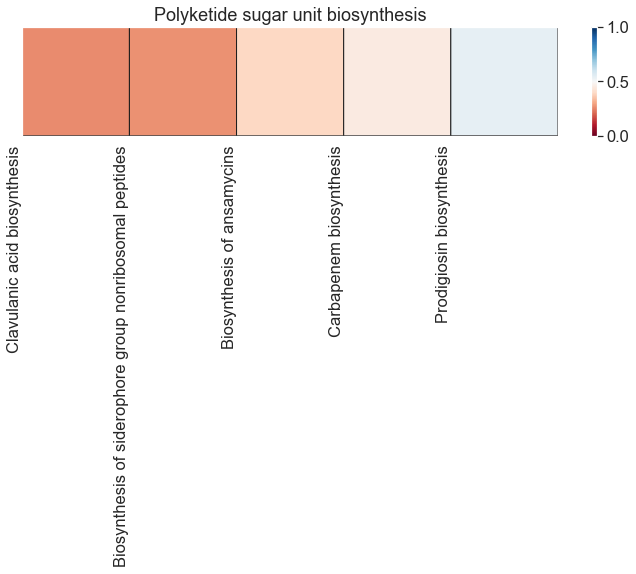

<Figure size 432x288 with 0 Axes>

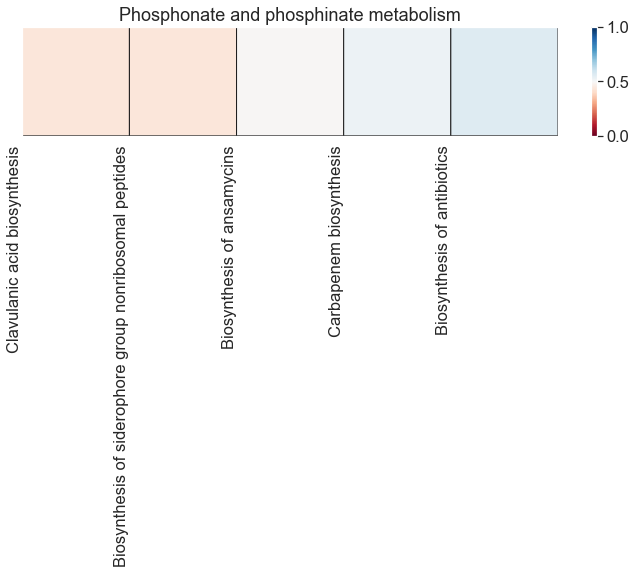

<Figure size 432x288 with 0 Axes>

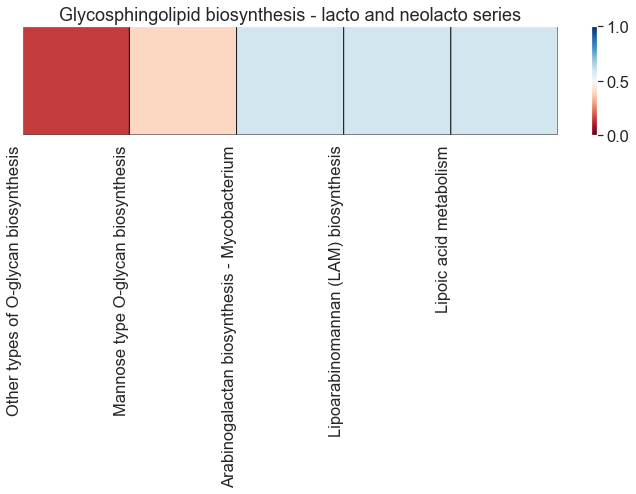

<Figure size 432x288 with 0 Axes>

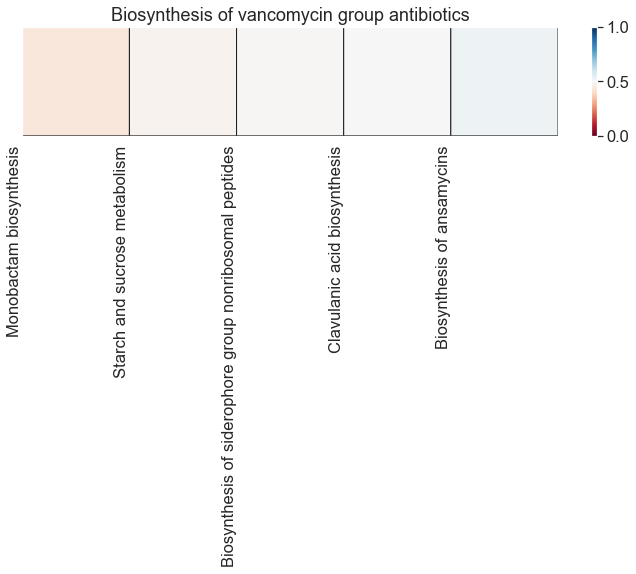

<Figure size 432x288 with 0 Axes>

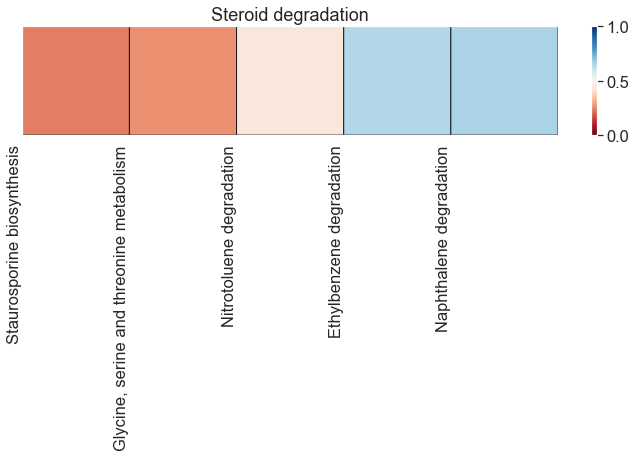

<Figure size 432x288 with 0 Axes>

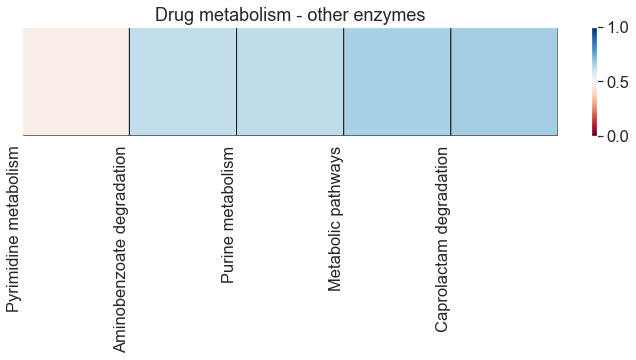

<Figure size 432x288 with 0 Axes>

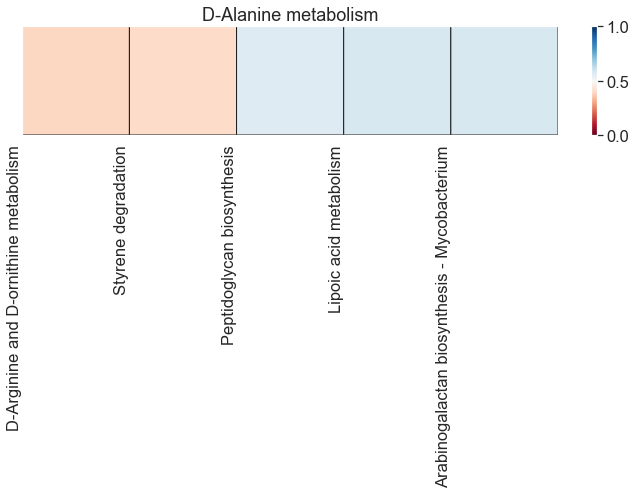

<Figure size 432x288 with 0 Axes>

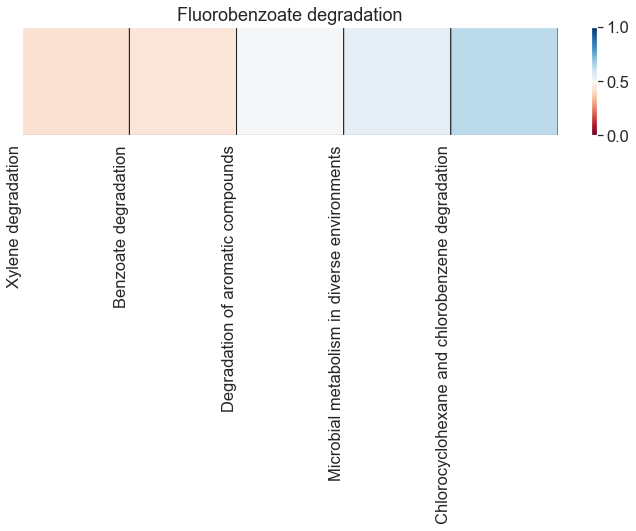

<Figure size 432x288 with 0 Axes>

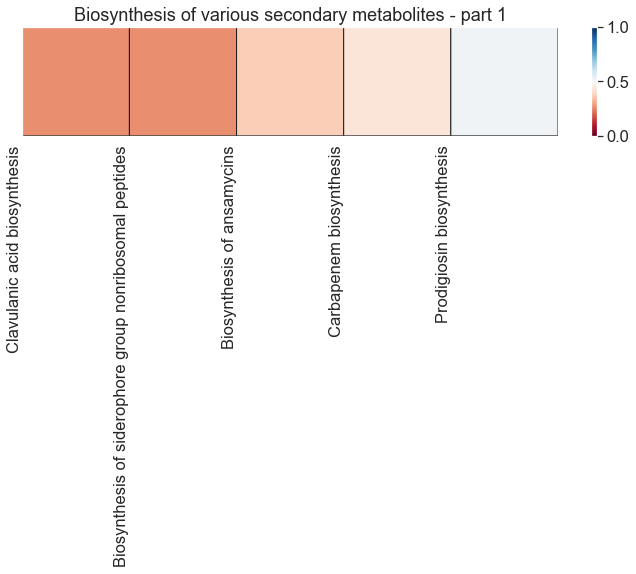

<Figure size 432x288 with 0 Axes>

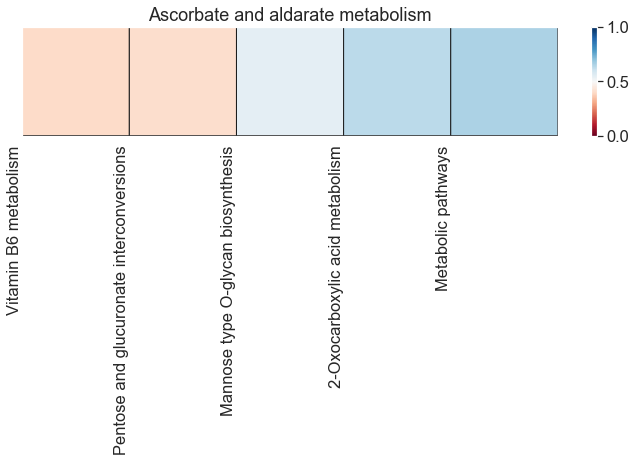

<Figure size 432x288 with 0 Axes>

In [16]:
df_result.head()
Validation().print_heat_map_for_one(df_result,test_df)

## Validate the model with new dataset from a gut microbial strain

In [17]:
test_df

,Map,Name,EC
61,map00523,Polyketide sugar unit biosynthesis,"[ec:2.7.7.24, ec:2.6.1.33, ec:1.1.1.134, ec:1...."
48,map00440,Phosphonate and phosphinate metabolism,"[ec:3.11.1.2, ec:5.4.2.9, ec:3.11.1.1, ec:2.7...."
76,map00601,Glycosphingolipid biosynthesis - lacto and neo...,"[ec:2.4.1.206, ec:2.4.1.149, ec:2.4.1.149, ec:..."
122,map01055,Biosynthesis of vancomycin group antibiotics,"[ec:4.2.1.159, ec:4.2.1.46, ec:1.13.11.80, ec:..."
115,map00984,Steroid degradation,"[ec:1.1.3.6, ec:1.3.99.5, ec:1.1.1.239, ec:1.1..."
114,map00983,Drug metabolism - other enzymes,"[ec:3.1.1.1, ec:3.5.4.5, ec:2.4.2.4, ec:1.14.1..."
53,map00473,D-Alanine metabolism,"[ec:5.1.1.1, ec:2.6.1.21, ec:6.3.2.4, ec:2.6.1..."
39,map00364,Fluorobenzoate degradation,"[ec:1.14.12.13, ec:6.2.1.33, ec:3.8.1.7, ec:3...."
118,map00999,Biosynthesis of various secondary metabolites ...,"[ec:4.2.3.7, ec:2.3.1.161, ec:4.2.3.36, ec:5.5..."
6,map00053,Ascorbate and aldarate metabolism,"[ec:1.10.3.3, ec:1.6.5.4, ec:1.2.1.26, ec:1.2...."


In [18]:
valid=['ec:4.2.1.166','ec:2.8.3.8','ec:3.1.2.1','ec:4.2.1.55','ec:1.1.1.157','ec:2.3.1.9'];valid_dist={}
valid_dist['Map']='PF06050'
valid_dist['Name']='UNK pathway'
valid_dist['EC']=[valid]
df_validate=pd.DataFrame(valid_dist)
df_validate

,Map,Name,EC
0,PF06050,UNK pathway,"[ec:4.2.1.166, ec:2.8.3.8, ec:3.1.2.1, ec:4.2...."


In [19]:
df_result=Validation().compare_test_train_docs(df_validate,train_df,model,dictionary)

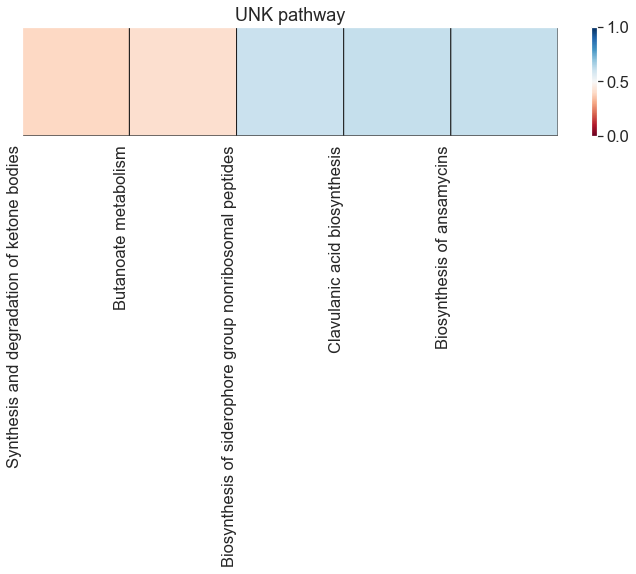

<Figure size 432x288 with 0 Axes>

In [20]:
Validation().print_heat_map_for_one(df_result,df_validate)